In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_style('white')
red_color = sns.color_palette('colorblind')[3]
green_color = sns.color_palette('colorblind')[2]

g1_x_neg = np.random.multivariate_normal((0, 0), [[1, .5], [.5, 2]], 1000)
g1_x_pos = np.random.multivariate_normal((2, 2), [[1, .5], [.5, 1]], 1000)

g2_x_neg = np.random.multivariate_normal((5, 0), [[1, .5], [.5, 2]], 1000)
g2_x_pos = np.random.multivariate_normal((7, 2), [[1, .5], [.5, 1]], 1000)

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<ipython-input-2-5d31f17631dc>:30: RuntimeWarning: covariance is not positive-semidefinite.
  neg = np.random.multivariate_normal((0, 0), [[.5, .2], [.3, .5]], n_examples)
No handles with labels found to put in legend.
<ipython-input-2-5d31f17631dc>:52: RuntimeWarning: covariance is not positive-semidefinite.
  neg = np.random.multivariate_normal((.52, .52), [[.75, .25], [.3, .75]], n_examples)
No handles with labels found to put in legend.


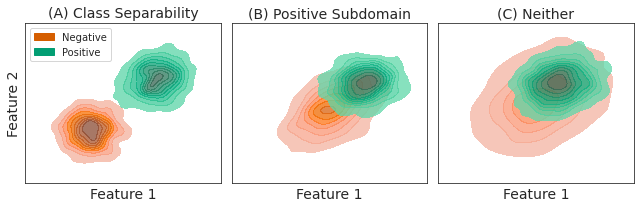

In [2]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(9, 3))

# Traditional PU learning setup
n_examples = 750
neg = np.random.multivariate_normal((0, 0), [[.2, 0], [0, .25]], n_examples)
pos = np.random.multivariate_normal((2, 2), [[.25, .05], [.05, .25]], n_examples)

neg = np.concatenate([neg, np.zeros((n_examples, 1))], axis=1)
pos = np.concatenate([pos, np.ones((n_examples, 1))], axis=1)
neg_df = pd.DataFrame(neg, columns=['feat1', 'feat2', 'label'])
pos_df = pd.DataFrame(pos, columns=['feat1', 'feat2', 'label'])
feats_df = pd.concat([neg_df, pos_df], ignore_index=True)
sns.kdeplot(data=feats_df, x='feat1', y='feat2', hue='label', fill=True,
            ax=axs[0], legend=True, palette=[red_color, green_color], alpha=.75)

red_patch = mpatches.Patch(color=red_color, label='Negative')
green_patch = mpatches.Patch(color=green_color, label='Positive')
axs[0].legend(handles = [red_patch, green_patch], labels = ['Negative','Positive'],loc = 'upper left')

axs[0].axes.xaxis.set_ticks([])
axs[0].axes.yaxis.set_ticks([])
axs[2].set_xlim(-2, 3.5)
#axs[2].set_ylim(-2.2, 3)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('(A) Class Separability', fontsize=BIGGER_SIZE)

# # our case

neg = np.random.multivariate_normal((0, 0), [[.5, .2], [.3, .5]], n_examples)
pos = np.random.multivariate_normal((1, 1), [[.25, .05], [.05, .2]], n_examples)
neg = np.concatenate([neg, np.zeros((n_examples, 1))], axis=1)
pos = np.concatenate([pos, np.ones((n_examples, 1))], axis=1)

neg_df = pd.DataFrame(neg, columns=['feat1', 'feat2', 'label'])
pos_df = pd.DataFrame(pos, columns=['feat1', 'feat2', 'label'])
feats_df = pd.concat([neg_df, pos_df], ignore_index=True)
sns.kdeplot(data=feats_df, x='feat1', y='feat2', hue='label', fill=True, alpha=.75, 
                palette = [red_color, green_color], ax=axs[1], legend=True)
axs[1].legend().set_visible(False)

axs[1].axes.xaxis.set_ticks([])
axs[1].axes.yaxis.set_ticks([])
axs[2].set_xlim(-2.5, 2.5)
axs[2].set_ylim(-2.5, 3)
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('')
axs[1].set_title('(B) Positive Subdomain', fontsize=BIGGER_SIZE)

# # our case

neg = np.random.multivariate_normal((.52, .52), [[.75, .25], [.3, .75]], n_examples)
pos = np.random.multivariate_normal((1, 1), [[.25, .05], [.05, .2]], n_examples)
neg = np.concatenate([neg, np.zeros((n_examples, 1))], axis=1)
pos = np.concatenate([pos, np.ones((n_examples, 1))], axis=1)

neg_df = pd.DataFrame(neg, columns=['feat1', 'feat2', 'label'])
pos_df = pd.DataFrame(pos, columns=['feat1', 'feat2', 'label'])
feats_df = pd.concat([neg_df, pos_df], ignore_index=True)
sns.kdeplot(data=feats_df, x='feat1', y='feat2', hue='label', fill=True, alpha=.75, 
                palette = [red_color, green_color], ax=axs[2], legend=True)
plt.gca().legend().set_visible(False)

axs[2].axes.xaxis.set_ticks([])
axs[2].axes.yaxis.set_ticks([])
axs[2].set_xlim(-2.2, 3)
axs[2].set_ylim(-2.2, 3)

axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('')
axs[2].set_title('(C) Neither', fontsize=BIGGER_SIZE)

plt.tight_layout()
plt.savefig('fig1.pdf', format='pdf', dpi=600)